In [2]:
import numpy as np
import pandas as pd
houses=pd.read_csv("https://raw.githubusercontent.com/if1015-datascience/material/gh-pages/data/recife.csv",encoding = "ISO-8859-1")
houses = houses[houses['price'] > 30000]
print(len(houses))
print(houses.head())


1220
    price  latitude  longitude  bedrooms  area  pkspaces  bathrooms  ensuites  \
1  330000 -8.029595 -34.900372       3.0  86.0       1.0        3.0       1.0   
2  255000 -8.037247 -34.890986       2.0  82.0       1.0        2.0       NaN   
3  380000 -8.047562 -34.876964       3.0  95.0       2.0        3.0       1.0   
4  300000 -8.053580 -34.908733       3.0  97.0       1.0        3.0       1.0   
5  320000 -8.026516 -34.917791       2.0  50.0       1.0        2.0       1.0   

         suburb district    city       state   type  
1   Tamarineira   Recife  Recife  Pernambuco  apart  
2  Encruzilhada   Recife  Recife  Pernambuco  apart  
3   Santo Amaro   Recife  Recife  Pernambuco  apart  
4      Madalena   Recife  Recife  Pernambuco  apart  
5  Casa Amarela   Recife  Recife  Pernambuco  apart  


## Removendo registros replicados

In [3]:
houses[houses.duplicated()].sort_values("latitude").head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type
1728,685000,-8.139813,-34.903769,3.0,128.0,1.0,2.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart
1250,685000,-8.139813,-34.903769,3.0,128.0,1.0,2.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart
1656,685000,-8.139813,-34.903769,3.0,128.0,1.0,2.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart
1461,700000,-8.138389,-34.905751,4.0,154.0,2.0,3.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart
532,124900,-8.132903,-34.902119,4.0,90.0,NaN,3.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart


In [0]:
len(houses)

1220

In [0]:
# removendo entradas duplicadas
houses.drop_duplicates(keep = False, inplace = True)
print(len(houses))

548


In [0]:
houses=pd.read_csv("https://raw.githubusercontent.com/if1015-datascience/material/gh-pages/data/recife.csv",encoding = "ISO-8859-1")
houses = houses[houses['price'] > 30000]

In [6]:
# removendo baseado em um conjunto de atributos
houses.drop_duplicates(subset =['latitude','longitude'], keep = False, inplace = True)
print(len(houses))
print(houses.head())

345
       price  latitude  longitude  bedrooms   area  pkspaces  bathrooms  \
308    45000 -8.035779 -34.887359       4.0   67.0       3.0        3.0   
415  1600000 -8.039761 -34.900415      15.0  194.0      15.0        NaN   
499    45000 -8.035371 -34.935030       4.0   70.0       3.0        NaN   
502   124900 -8.046449 -34.908543       4.0   69.0       3.0        3.0   
903   550000 -8.032964 -34.905096       3.0   92.0       2.0        NaN   

     ensuites        suburb district    city       state   type  
308       1.0  Encruzilhada   Recife  Recife  Pernambuco  apart  
415       NaN       GraÌ¤as   Recife  Recife  Pernambuco  apart  
499       1.0      Iputinga   Recife  Recife  Pernambuco  apart  
502       NaN         Torre   Recife  Recife  Pernambuco  apart  
903       NaN   Tamarineira   Recife  Recife  Pernambuco  apart  


## Removendo outliers utilizando z-score robusto (univariado)




In [8]:
houses['area'].describe()

count    1220.000000
mean      128.066484
std       102.078742
min        25.000000
25%        72.000000
50%       100.000000
75%       149.000000
max      1682.000000
Name: area, dtype: float64

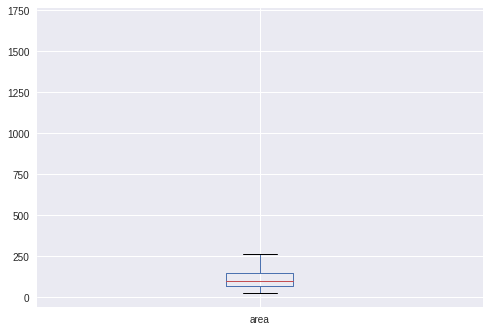

In [10]:
houses['area'].plot.box()

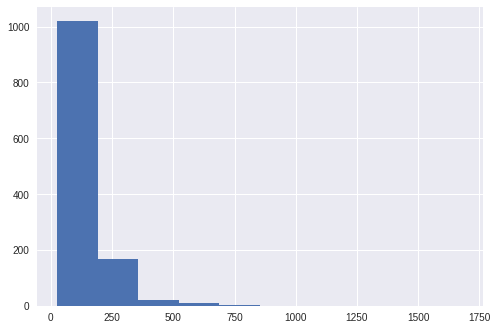

In [11]:
houses['area'].hist()

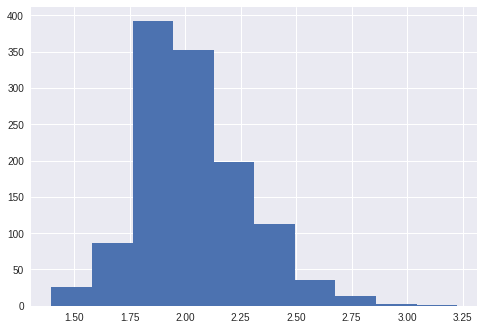

In [12]:
from numpy import log10
houses['area_log'] = log10(houses['area'])
houses['area_log'].hist()

In [13]:
from numpy import abs
mad = abs(houses['area_log'] - houses['area_log'].median()).median()*(1/0.6745)
print(mad)

0.22965449960821804


In [0]:
houses['area_log'].mad()

0.18584607536436853

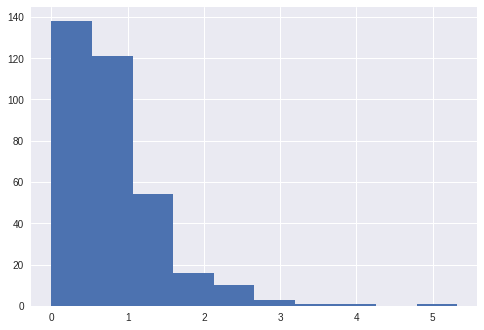

In [0]:
(abs(houses['area_log']-houses['area_log'].median())/mad).hist()

In [14]:
houses[abs(houses['area_log']-houses['area_log'].median())/mad > 3.5]


,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,area_log
41,1600000,-8.045155,-34.902060,5.0,675.0,5.0,7.0,5.0,GraÌ¤as,Recife,Recife,Pernambuco,apart,2.829304
52,1600000,-8.045155,-34.902060,5.0,675.0,5.0,7.0,5.0,GraÌ¤as,Recife,Recife,Pernambuco,apart,2.829304
426,2500000,-8.033553,-34.918960,6.0,680.0,5.0,8.0,6.0,Casa Forte,Recife,Recife,Pernambuco,apart,2.832509
563,1600000,-8.045155,-34.902060,5.0,675.0,5.0,7.0,5.0,GraÌ¤as,Recife,Recife,Pernambuco,apart,2.829304
808,1600000,-8.045155,-34.902060,5.0,675.0,5.0,7.0,5.0,GraÌ¤as,Recife,Recife,Pernambuco,apart,2.829304
877,2500000,-8.033553,-34.918960,6.0,680.0,5.0,8.0,6.0,Casa Forte,Recife,Recife,Pernambuco,apart,2.832509
942,850000,-8.037278,-34.932243,3.0,750.0,5.0,NaN,NaN,Iputinga,Recife,Recife,Pernambuco,house,2.875061
1012,900000,-8.057838,-34.882897,3.0,689.0,5.0,NaN,NaN,Boa Vista,Recife,Recife,Pernambuco,house,2.838219
1167,7500000,-8.122141,-34.896076,3.0,820.0,5.0,4.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart,2.913814
1364,7000000,-8.055745,-34.892368,5.0,1682.0,0.0,4.0,NaN,Soledade,Recife,Recife,Pernambuco,house,3.225826


In [15]:
houses = houses[abs(houses['area_log']-houses['area_log'].median())/mad < 3.5]
print(len(houses))

1210


## Removendo outliers utilizando método de tukey (univariado)

In [16]:
houses['price'].describe()

count    1.210000e+03
mean     6.468194e+05
std      5.409202e+05
min      4.500000e+04
25%      3.300000e+05
50%      4.700000e+05
75%      7.400000e+05
max      3.900000e+06
Name: price, dtype: float64

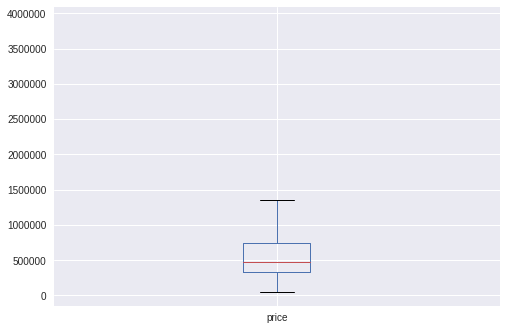

In [17]:
houses['price'].plot.box()

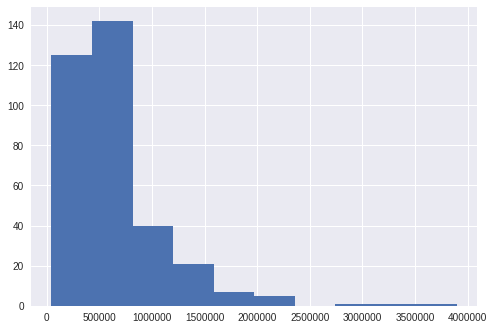

In [0]:
houses['price'].hist()

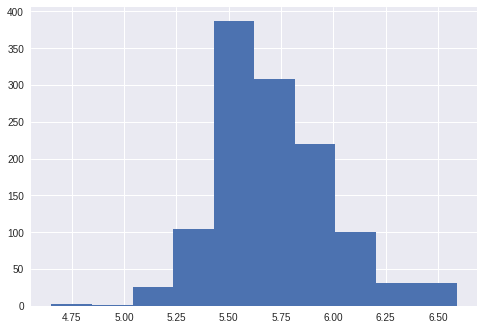

In [18]:
houses['price_log'] = log10(houses['price'])
houses['price_log'].hist()

In [19]:
q1 = houses['price_log'].quantile(q=0.25)
q3 = houses['price_log'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

0.35071777985308916


In [20]:
houses[houses['price_log'] < (q1-1.5*iqr)]

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,area_log,price_log
308,45000,-8.035779,-34.887359,4.0,67.0,3.0,3.0,1.0,Encruzilhada,Recife,Recife,Pernambuco,apart,1.826075,4.653213
499,45000,-8.035371,-34.935030,4.0,70.0,3.0,NaN,1.0,Iputinga,Recife,Recife,Pernambuco,apart,1.845098,4.653213
1220,90000,-8.060194,-34.887513,1.0,65.0,1.0,1.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart,1.812913,4.954243


In [21]:
houses[houses['price_log'] > (q3+1.5*iqr)]

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,area_log,price_log
69,3000000,-8.036285,-34.903731,4.0,300.0,4.0,6.0,4.0,Jaqueira,Recife,Recife,Pernambuco,apart,2.477121,6.477121
115,3300000,-8.039791,-34.896209,4.0,177.0,3.0,3.0,1.0,Aflitos,Recife,Recife,Pernambuco,apart,2.247973,6.518514
120,2858000,-8.112539,-34.904207,4.0,70.0,NaN,3.0,NaN,Imbiribeira,Recife,Recife,Pernambuco,apart,1.845098,6.456062
130,3300000,-8.113703,-34.891219,4.0,175.0,NaN,3.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart,2.243038,6.518514
264,2858000,-8.043143,-34.891382,4.0,62.0,3.0,3.0,1.0,Espinheiro,Recife,Recife,Pernambuco,apart,1.792392,6.456062
329,3000000,-8.033553,-34.918960,5.0,330.0,4.0,4.0,2.0,Casa Forte,Recife,Recife,Pernambuco,apart,2.518514,6.477121
343,3840000,-8.033553,-34.918960,5.0,384.0,5.0,7.0,5.0,Casa Forte,Recife,Recife,Pernambuco,apart,2.584331,6.584331
385,3840000,-8.033553,-34.918960,5.0,384.0,5.0,7.0,5.0,Casa Forte,Recife,Recife,Pernambuco,apart,2.584331,6.584331
400,2858000,-8.054936,-34.889466,4.0,51.0,NaN,3.0,NaN,Soledade,Recife,Recife,Pernambuco,apart,1.707570,6.456062
411,3300000,-8.060634,-34.905875,4.0,85.0,NaN,3.0,NaN,Madalena,Recife,Recife,Pernambuco,apart,1.929419,6.518514


In [22]:
houses = houses[(houses['price_log'] > (q1-1.5*iqr)) & (houses['price_log'] < (q3+1.5*iqr))]
len(houses)

1176

## Removendo outliers usando razão de duas variáveis (bivariado)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


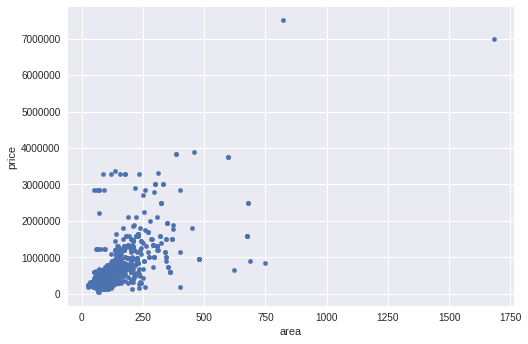

In [24]:
houses.plot.scatter(x='area',y='price')

In [0]:
houses['price_m2'] = houses['price'] / houses['area']

In [26]:
houses['price_m2'].describe()

count     1220.000000
mean      5499.916207
std       3602.510737
min        497.500000
25%       3930.070083
50%       5268.817204
75%       6399.019608
max      56039.215686
Name: price_m2, dtype: float64

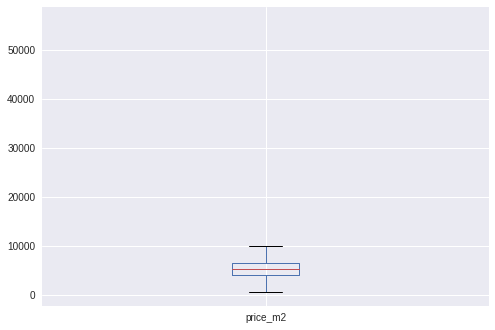

In [27]:
houses['price_m2'].plot.box()

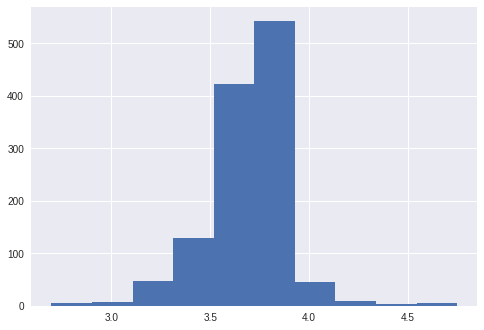

In [31]:
houses['price_m2'].hist()

In [0]:
houses['price_m2'] = log10(houses['price_m2'])

In [0]:
mad = abs(houses['price_m2'] - houses['price_m2'].median()).median()*(1/0.6745)

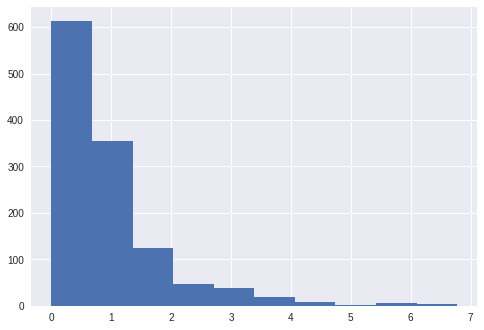

In [33]:
(abs(houses['price_m2']-houses['price_m2'].median())/mad).hist()

In [34]:
houses[abs(houses['price_m2']-houses['price_m2'].median())/mad > 3.5]

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,price_m2
10,1238839,-8.056542,-34.943772,4.0,58.0,3.0,3.0,1.0,Engenho do Meio,Recife,Recife,Pernambuco,apart,4.329587
70,124900,-8.126764,-34.903425,4.0,107.0,NaN,3.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart,3.067179
76,124900,-8.132903,-34.902119,4.0,90.0,NaN,3.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart,3.142320
88,119900,-8.060634,-34.905875,4.0,85.0,NaN,3.0,NaN,Madalena,Recife,Recife,Pernambuco,apart,3.149400
115,3300000,-8.039791,-34.896209,4.0,177.0,3.0,3.0,1.0,Aflitos,Recife,Recife,Pernambuco,apart,4.270541
120,2858000,-8.112539,-34.904207,4.0,70.0,NaN,3.0,NaN,Imbiribeira,Recife,Recife,Pernambuco,apart,4.610964
130,3300000,-8.113703,-34.891219,4.0,175.0,NaN,3.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart,4.275476
144,155000,-8.120764,-34.899239,4.0,120.0,NaN,3.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart,3.111150
155,124900,-8.120252,-34.895666,4.0,205.0,NaN,3.0,NaN,Boa Viagem,Recife,Recife,Pernambuco,apart,2.784809
225,119900,-8.060634,-34.905875,4.0,85.0,NaN,3.0,NaN,Madalena,Recife,Recife,Pernambuco,apart,3.149400


In [35]:
houses = houses[abs(houses['price_m2']-houses['price_m2'].median())/mad < 3.5]
print(len(houses))

1179


## Removendo outliers  com Elliptic Envelope (multivariado)

In [37]:
houses=pd.read_csv("https://raw.githubusercontent.com/if1015-datascience/material/gh-pages/data/recife.csv",encoding = "ISO-8859-1")
houses = houses[houses['price'] > 30000]
houses = houses.dropna()
print(houses.head())

    price  latitude  longitude  bedrooms   area  pkspaces  bathrooms  \
1  330000 -8.029595 -34.900372       3.0   86.0       1.0        3.0   
3  380000 -8.047562 -34.876964       3.0   95.0       2.0        3.0   
4  300000 -8.053580 -34.908733       3.0   97.0       1.0        3.0   
5  320000 -8.026516 -34.917791       2.0   50.0       1.0        2.0   
6  750000 -8.047562 -34.876964       4.0  115.0       2.0        4.0   

   ensuites        suburb district    city       state   type  
1       1.0   Tamarineira   Recife  Recife  Pernambuco  apart  
3       1.0   Santo Amaro   Recife  Recife  Pernambuco  apart  
4       1.0      Madalena   Recife  Recife  Pernambuco  apart  
5       1.0  Casa Amarela   Recife  Recife  Pernambuco  apart  
6       2.0   Santo Amaro   Recife  Recife  Pernambuco  apart  


In [38]:
houses.dtypes

price          int64
latitude     float64
longitude    float64
bedrooms     float64
area         float64
pkspaces     float64
bathrooms    float64
ensuites     float64
suburb        object
district      object
city          object
state         object
type          object
dtype: object

In [0]:
houses['suburb'] = houses['suburb'].astype('category')
houses['district'] = houses['district'].astype('category')
houses['city'] = houses['city'].astype('category')
houses['state'] = houses['state'].astype('category')
houses['type'] = houses['type'].astype('category')

In [41]:
houses['suburb'] = houses['suburb'].cat.codes
houses['district'] = houses['district'].cat.codes
houses['city'] = houses['city'].cat.codes
houses['state'] = houses['state'].cat.codes
houses['type'] = houses['type'].cat.codes

AttributeError: ignored

In [42]:
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,27,0,0,0,0
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,24,0,0,0,0
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,19,0,0,0,0
5,320000,-8.026516,-34.917791,2.0,50.0,1.0,2.0,1.0,6,0,0,0,0
6,750000,-8.047562,-34.876964,4.0,115.0,2.0,4.0,2.0,24,0,0,0,0


In [43]:
from sklearn.covariance import EllipticEnvelope
detector = EllipticEnvelope(contamination=0.01)
detector.fit(houses)

/usr/local/lib/python3.6/dist-packages/sklearn/covariance/robust_covariance.py:646: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


EllipticEnvelope(assume_centered=False, contamination=0.01, random_state=None,
         store_precision=True, support_fraction=None)

In [0]:
scores = detector.predict(houses)

In [45]:
scores

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [46]:
houses['outlier'] = scores
print(houses.head())

    price  latitude  longitude  bedrooms   area  pkspaces  bathrooms  \
1  330000 -8.029595 -34.900372       3.0   86.0       1.0        3.0   
3  380000 -8.047562 -34.876964       3.0   95.0       2.0        3.0   
4  300000 -8.053580 -34.908733       3.0   97.0       1.0        3.0   
5  320000 -8.026516 -34.917791       2.0   50.0       1.0        2.0   
6  750000 -8.047562 -34.876964       4.0  115.0       2.0        4.0   

   ensuites  suburb  district  city  state  type  outlier  
1       1.0      27         0     0      0     0        1  
3       1.0      24         0     0      0     0        1  
4       1.0      19         0     0      0     0        1  
5       1.0       6         0     0      0     0        1  
6       2.0      24         0     0      0     0        1  


In [47]:
houses[houses['outlier'] == -1]

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,outlier
41,1600000,-8.045155,-34.902060,5.0,675.0,5.0,7.0,5.0,13,0,0,0,0,-1
52,1600000,-8.045155,-34.902060,5.0,675.0,5.0,7.0,5.0,13,0,0,0,0,-1
115,3300000,-8.039791,-34.896209,4.0,177.0,3.0,3.0,1.0,0,0,0,0,0,-1
264,2858000,-8.043143,-34.891382,4.0,62.0,3.0,3.0,1.0,12,0,0,0,0,-1
563,1600000,-8.045155,-34.902060,5.0,675.0,5.0,7.0,5.0,13,0,0,0,0,-1
808,1600000,-8.045155,-34.902060,5.0,675.0,5.0,7.0,5.0,13,0,0,0,0,-1
826,3357000,-8.056198,-34.899656,4.0,136.0,3.0,3.0,1.0,9,0,0,0,0,-1


In [51]:
houses = houses[houses['outlier'] != -1]
len(houses)

627

## Removendo outliers com Isolation Forests (multivariado)

In [48]:
houses=pd.read_csv("https://raw.githubusercontent.com/if1015-datascience/material/gh-pages/data/recife.csv",encoding = "ISO-8859-1")
houses = houses[houses['price'] > 30000]
houses = houses.dropna()
print(houses.head())

    price  latitude  longitude  bedrooms   area  pkspaces  bathrooms  \
1  330000 -8.029595 -34.900372       3.0   86.0       1.0        3.0   
3  380000 -8.047562 -34.876964       3.0   95.0       2.0        3.0   
4  300000 -8.053580 -34.908733       3.0   97.0       1.0        3.0   
5  320000 -8.026516 -34.917791       2.0   50.0       1.0        2.0   
6  750000 -8.047562 -34.876964       4.0  115.0       2.0        4.0   

   ensuites        suburb district    city       state   type  
1       1.0   Tamarineira   Recife  Recife  Pernambuco  apart  
3       1.0   Santo Amaro   Recife  Recife  Pernambuco  apart  
4       1.0      Madalena   Recife  Recife  Pernambuco  apart  
5       1.0  Casa Amarela   Recife  Recife  Pernambuco  apart  
6       2.0   Santo Amaro   Recife  Recife  Pernambuco  apart  


In [0]:
houses['suburb'] = houses['suburb'].astype('category')
houses['district'] = houses['district'].astype('category')
houses['city'] = houses['city'].astype('category')
houses['state'] = houses['state'].astype('category')
houses['type'] = houses['type'].astype('category')

In [0]:
houses['suburb'] = houses['suburb'].cat.codes
houses['district'] = houses['district'].cat.codes
houses['city'] = houses['city'].cat.codes
houses['state'] = houses['state'].cat.codes
houses['type'] = houses['type'].cat.codes

In [51]:
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(houses)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
        max_features=1.0, max_samples=100, n_estimators=100, n_jobs=None,
        random_state=<mtrand.RandomState object at 0x7f515034f0d8>,
        verbose=0)

In [52]:
scores = clf.predict(houses)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [53]:
scores

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1

In [54]:
houses['outlier'] = scores
print(houses.head())

    price  latitude  longitude  bedrooms   area  pkspaces  bathrooms  \
1  330000 -8.029595 -34.900372       3.0   86.0       1.0        3.0   
3  380000 -8.047562 -34.876964       3.0   95.0       2.0        3.0   
4  300000 -8.053580 -34.908733       3.0   97.0       1.0        3.0   
5  320000 -8.026516 -34.917791       2.0   50.0       1.0        2.0   
6  750000 -8.047562 -34.876964       4.0  115.0       2.0        4.0   

   ensuites  suburb  district  city  state  type  outlier  
1       1.0      27         0     0      0     0        1  
3       1.0      24         0     0      0     0        1  
4       1.0      19         0     0      0     0        1  
5       1.0       6         0     0      0     0        1  
6       2.0      24         0     0      0     0        1  


In [55]:
houses[houses['outlier'] == -1]

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,outlier
41,1600000,-8.045155,-34.902060,5.0,675.0,5.0,7.0,5.0,13,0,0,0,0,-1
52,1600000,-8.045155,-34.902060,5.0,675.0,5.0,7.0,5.0,13,0,0,0,0,-1
69,3000000,-8.036285,-34.903731,4.0,300.0,4.0,6.0,4.0,18,0,0,0,0,-1
74,1500000,-8.043143,-34.891382,6.0,345.0,2.0,6.0,3.0,12,0,0,0,0,-1
84,950000,-8.094108,-34.885570,4.0,161.0,3.0,6.0,4.0,21,0,0,0,0,-1
92,600000,-8.032509,-34.887935,5.0,360.0,3.0,3.0,1.0,14,0,0,0,1,-1
100,330000,-8.131730,-34.902409,2.0,50.0,2.0,2.0,1.0,4,0,0,0,0,-1
165,605000,-8.110156,-34.936597,4.0,100.0,3.0,3.0,1.0,15,0,0,0,0,-1
184,1000000,-8.129785,-34.911789,5.0,293.0,3.0,4.0,2.0,17,0,0,0,1,-1
191,592139,-8.110156,-34.936597,4.0,100.0,3.0,3.0,1.0,15,0,0,0,0,-1


In [56]:
houses = houses[houses['outlier'] != -1]
len(houses)

570

## Removendo  outliers com Local Outlier Factor (multivariado)

In [57]:
houses=pd.read_csv("https://raw.githubusercontent.com/if1015-datascience/material/gh-pages/data/recife.csv",encoding = "ISO-8859-1")
houses = houses[houses['price'] > 30000]
houses = houses.dropna()
print(houses.head())

    price  latitude  longitude  bedrooms   area  pkspaces  bathrooms  \
1  330000 -8.029595 -34.900372       3.0   86.0       1.0        3.0   
3  380000 -8.047562 -34.876964       3.0   95.0       2.0        3.0   
4  300000 -8.053580 -34.908733       3.0   97.0       1.0        3.0   
5  320000 -8.026516 -34.917791       2.0   50.0       1.0        2.0   
6  750000 -8.047562 -34.876964       4.0  115.0       2.0        4.0   

   ensuites        suburb district    city       state   type  
1       1.0   Tamarineira   Recife  Recife  Pernambuco  apart  
3       1.0   Santo Amaro   Recife  Recife  Pernambuco  apart  
4       1.0      Madalena   Recife  Recife  Pernambuco  apart  
5       1.0  Casa Amarela   Recife  Recife  Pernambuco  apart  
6       2.0   Santo Amaro   Recife  Recife  Pernambuco  apart  


In [0]:
houses['suburb'] = houses['suburb'].astype('category')
houses['district'] = houses['district'].astype('category')
houses['city'] = houses['city'].astype('category')
houses['state'] = houses['state'].astype('category')
houses['type'] = houses['type'].astype('category')
houses['suburb'] = houses['suburb'].cat.codes
houses['district'] = houses['district'].cat.codes
houses['city'] = houses['city'].cat.codes
houses['state'] = houses['state'].cat.codes
houses['type'] = houses['type'].cat.codes

In [0]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=10, contamination=0.1)

In [0]:
scores = clf.fit_predict(houses)

In [17]:
-1*clf.negative_outlier_factor_

array([  0.99550755,   0.98065116,   0.96875746,   1.01000279,
         1.19990705,   0.99658284,   0.98087688, 113.56302551,
         1.00645414,   1.02389185,   0.96668316,   0.97936462,
         1.58398584,   0.96223473,   1.01863343,   1.20069367,
         0.99305488,   1.00226086,   0.98211453,   1.10600849,
         1.00398081,   0.99999957,   0.96838381,   1.04889926,
         1.03552567,  46.26547697,   0.99913593,   0.98161966,
       101.64303233,  44.97243171,   0.99999151,   0.99014948,
         0.99405118, 212.22740575,   0.99405118,   1.23667372,
         1.16203187,   0.99999151,   1.00771502,   1.20788056,
         0.94932997,   1.27818362,   1.0768772 ,  39.93685988,
         1.020861  , 227.19302679,   0.98333398,  13.56598885,
         1.02296744,   0.99014948,   0.97273916, 113.56300168,
         1.52551358,   1.00000008, 125.76217967,   1.01557413,
         1.00791736, 376.35088334,   1.5280232 ,   1.02851801,
         0.99653332,   0.95124315,   0.9579145 ,   1.00

In [61]:
scores

array([ 1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [62]:
houses['outlier'] = scores
print(houses.head())

    price  latitude  longitude  bedrooms   area  pkspaces  bathrooms  \
1  330000 -8.029595 -34.900372       3.0   86.0       1.0        3.0   
3  380000 -8.047562 -34.876964       3.0   95.0       2.0        3.0   
4  300000 -8.053580 -34.908733       3.0   97.0       1.0        3.0   
5  320000 -8.026516 -34.917791       2.0   50.0       1.0        2.0   
6  750000 -8.047562 -34.876964       4.0  115.0       2.0        4.0   

   ensuites  suburb  district  city  state  type  outlier  
1       1.0      27         0     0      0     0        1  
3       1.0      24         0     0      0     0        1  
4       1.0      19         0     0      0     0        1  
5       1.0       6         0     0      0     0        1  
6       2.0      24         0     0      0     0        1  


In [63]:
houses[houses['outlier'] == -1]

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,outlier
10,1238839,-8.056542,-34.943772,4.0,58.0,3.0,3.0,1.0,11,0,0,0,0,-1
38,315000,-8.045155,-34.902060,3.0,106.0,1.0,3.0,1.0,13,0,0,0,0,-1
45,396000,-8.029595,-34.900372,4.0,60.0,3.0,3.0,1.0,27,0,0,0,0,-1
64,540000,-8.026516,-34.917791,3.0,93.0,2.0,3.0,1.0,6,0,0,0,0,-1
71,1238839,-8.032163,-34.881336,4.0,75.0,3.0,3.0,1.0,5,0,0,0,0,-1
75,425000,-8.045011,-34.909918,3.0,61.0,1.0,2.0,1.0,28,0,0,0,0,-1
79,690000,-8.047562,-34.876964,4.0,112.0,2.0,4.0,3.0,24,0,0,0,0,-1
137,325000,-8.037247,-34.890986,2.0,60.0,1.0,2.0,1.0,10,0,0,0,0,-1
145,365000,-8.045011,-34.909918,3.0,102.0,2.0,3.0,1.0,28,0,0,0,0,-1
163,840000,-8.043143,-34.891382,4.0,230.0,3.0,6.0,2.0,12,0,0,0,0,-1


In [64]:
houses = houses[houses['outlier'] != -1]
len(houses)

571